<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [ ]:
#Leyendo los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#url='https://raw.githubusercontentcom/Kevincancino26/mis-notebook-de-estudio-/blob/main/data-science-probando-relaciones-con-regresion-lineal-main/precios_casas.csv'
url='/content/precios_casas.csv'
datos=pd.read_csv(url, delimiter=',')
datos.head(3)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0


In [ ]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
datos=datos.drop(columns=['Id'])
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [ ]:
# Correlación
corr=datos.corr()


In [ ]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [ ]:
# Actividad
# Cuáles factores están más correlacionados? cantidad de baños y precio de venta son las dos areas que se relacionan mas con todas las demas variables
corr['cantidad_banos']

,cantidad_banos
area_primer_piso,0.369368
tiene_segundo_piso,0.292780
area_segundo_piso,0.412777
cantidad_banos,1.000000
capacidad_carros_garage,0.409281
calidad_de_cocina_excelente,0.154102
precio_de_venta,0.563132


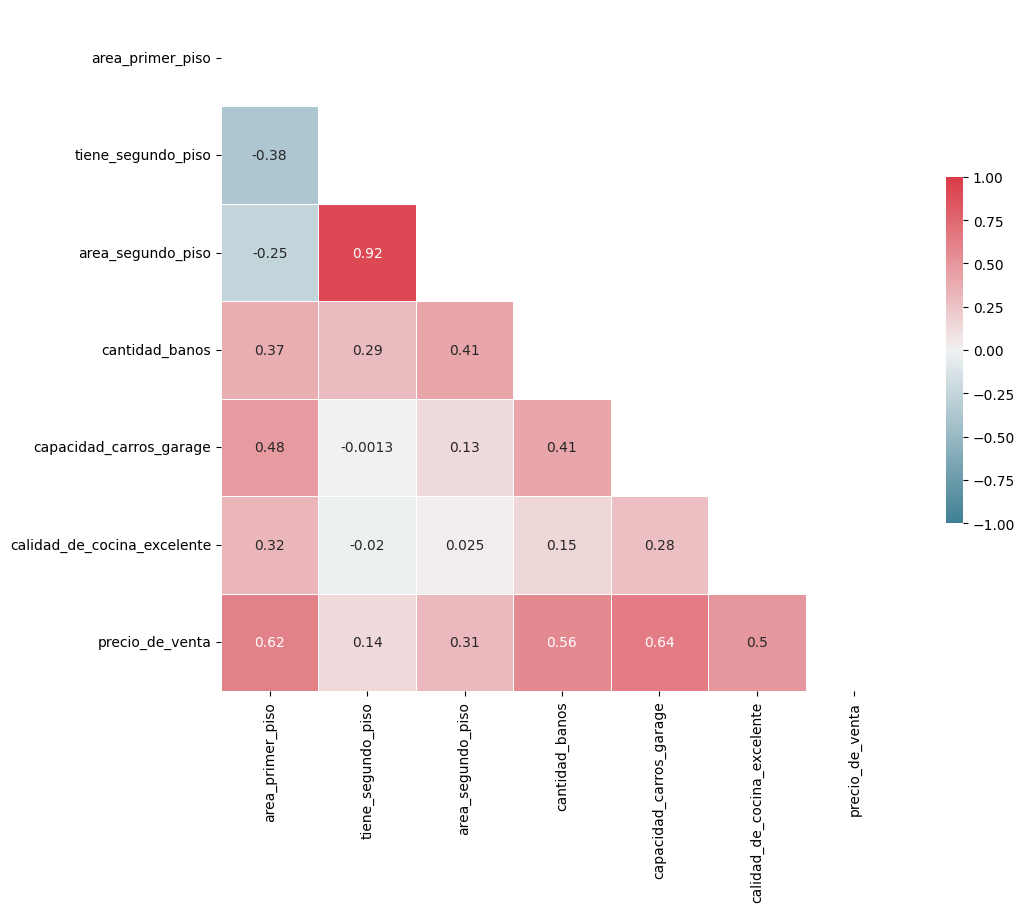

In [ ]:
# Actividad

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Consejo**: Presta atención a los puntos a continuación para un análisis completo:


**Intensidad:** se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.


**Dirección:** se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

**Ejemplo:**

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

## Relacionando variables

In [ ]:
# importando los paquetes para la visualización
import plotly.express as px

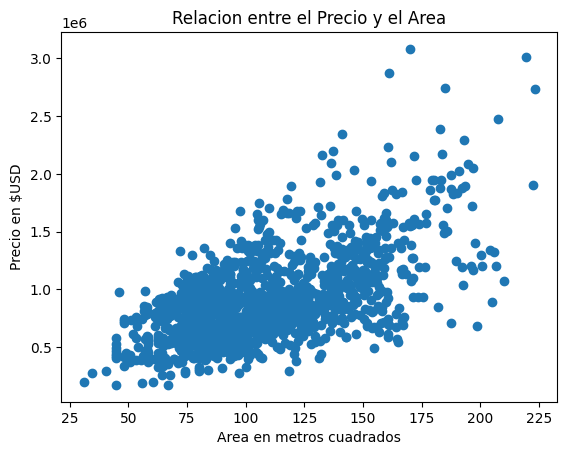

In [ ]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.title('Relacion entre el Precio y el Area')
plt.xlabel('Area en metros cuadrados')
plt.ylabel('Precio en $USD')
plt.show()

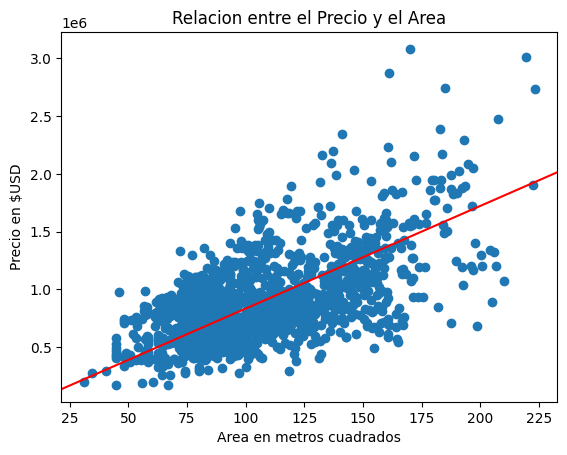

In [ ]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.

plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.title('Relacion entre el Precio y el Area')
plt.xlabel('Area en metros cuadrados')
plt.ylabel('Precio en $USD')
plt.show()

## Mejor recta

In [ ]:
# Cuál es la recta que mejor se ajusta a esta relación (calculando la ecuacion de la recta de la regresion lineal)
#utilizamos el metodo de los minimos cuadrados ordinarios 'ols' (nos ayuda a averiguar la distancia minima de los residuos)
px.scatter(datos,x='area_primer_piso',y='precio_de_venta',trendline_color_override='red',trendline='ols')


En esta clase, aprendiste a:
Obtener el coeficiente de correlación de los datos;
Analizar la intensidad y la dirección de la correlación entre dos variables;
Identificar la linealidad en el gráfico de dispersión;
Diferenciar la variable explicativa de la variable respuesta;
Visualizar la mejor línea utilizando Plotly.

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

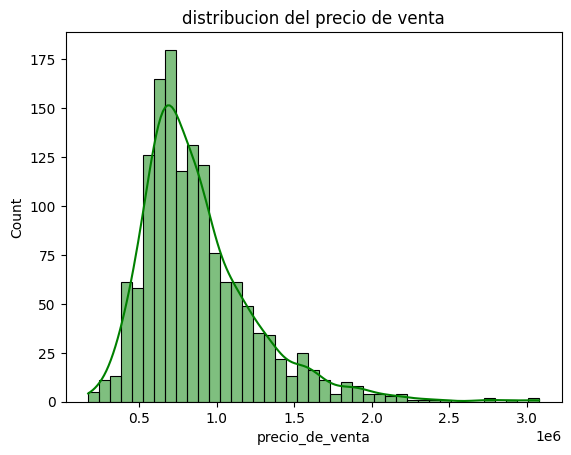

In [ ]:
#Quién es nuestra variable de respuesta?
sns.histplot(datos['precio_de_venta'],kde=True,color='green')
plt.title('distribucion del precio de venta')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#Datos de entrenamiento para usar la fórmula
y=datos['precio_de_venta']
x=datos.drop(columns=['precio_de_venta'])
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)#garantizar la reproductivilidad de la segregacion de los datos


In [ ]:

#creamos un dataframe de entrenamiento que tiene nuestra variable dependiente e independiente
df_train=pd.DataFrame(x_train)
df_train['precio_de_venta']=y_train


In [ ]:
# import ols
from statsmodels.formula.api import ols


In [ ]:
# ajustando el primer modelo
modelo_0=ols('precio_de_venta~area_primer_piso',data=df_train).fit()#cuando hacemos fit, estamos diciendo ajusta esta combinacion, entrenando el modelo 0 a los datos de entrenamiento considerando las dos variables

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [ ]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


el punto de intercepcion es el punto donde x tiene un valor de 0 y "y" un valor c, es decir que es el punto donde x pasas el eje y, en esste caos cuando x=0, y tendre un valor a y=152909.288334, en correlaicon es decir cuando mi propiedad su area sea igual a 0 la propiedad costara 152909 dolares, es decir el terreno ya de posri tiene un valor

el efecto individual (utilizando el area del primer piso) es la pendeinte o inclinacion es decir por cada metro que avanso en el eje x, el area de la casa es mayor, entonces yop tengo un efecto que el precio aumento x cantidad en este caso si la casa aumenta 50m2 entonces seria 50m2 x 6793.641641

In [ ]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        16:23:18   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

al ver la tabla podemos observar nuesstro inmueble va a costar 6793 dolares con un envio estandar de 275.455.

esto me dice que con el error puedo tener un precio un poco mas alto en algunas propiedades como 7001 etc, esto dado que al utilizar ols, nos ayuda a sacar los valores atipicos y solo se concentra en el metodo de los minimo cuadrados ordinarios

cuando tenemos el valor P = 0 noss dice que hay significancia estaditica para este modelo, nos explica que la relacion del area con precio, si tienen una relacion

###para la estimacion de regresion lineal simple

La regresión lineal fue la metodología que ajustó la mejor línea que representa linealmente la interacción entre X e Y; en nuestro caso, el tamaño del área del primer piso y el precio de venta de la casa.

Vale la pena repasar cada componente de la regresión lineal:

**Función**:

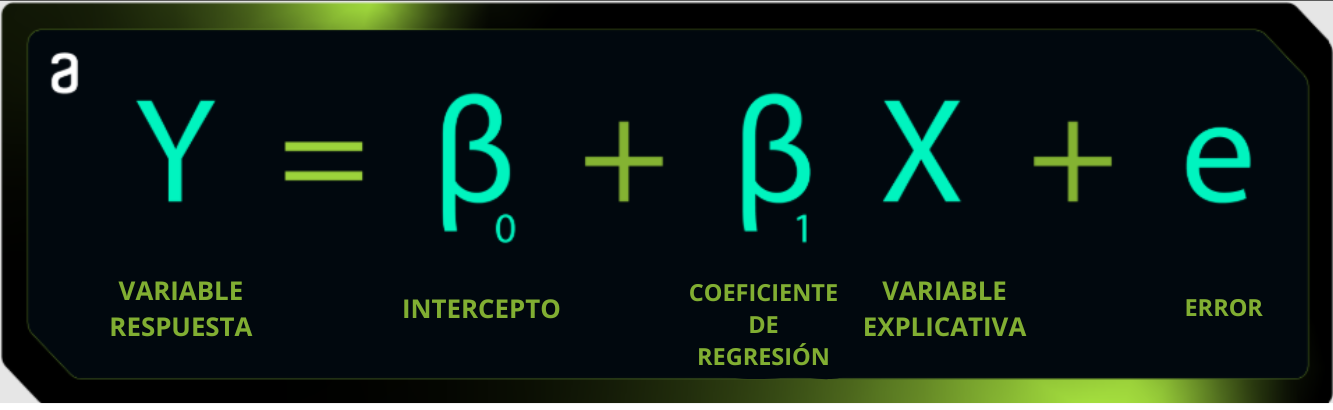

Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.
Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.
Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.
Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.
Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta.

** Coeficientes**
La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.
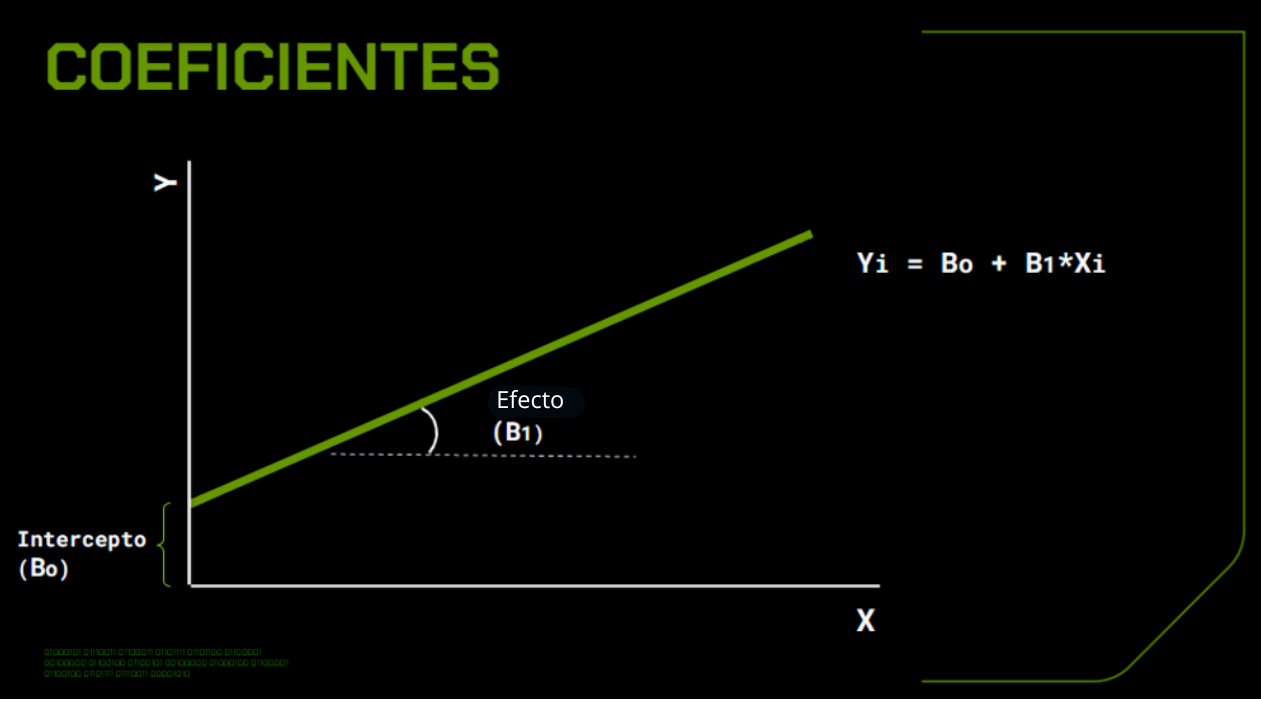

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [ ]:
# observando el R²
modelo_0.rsquared

np.float64(0.37728010994297867)

que quiere decir este valor, que se esta ajustando el modelo,dado que si este es mas cercano a 1 nos dice que este se ajusta bien a nuestra variable pero mas cercano a cero nos dice que no se ajust abien, es decir, cual es el porcentaje del area del primer píso explica la variacion del precio de la casa? el area del primer piso explica en un 37.7% la variacion de precio de la casa, habiendo un 62.3% del precio de la casa que no esta siendo explicado por la variacion del primer piso

## Entendiendo el resíduo

In [ ]:
# Quiénes son los residuos?
round(modelo_0.rsquared,2)

np.float64(0.38)

In [ ]:
# Cómo están distribuidos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


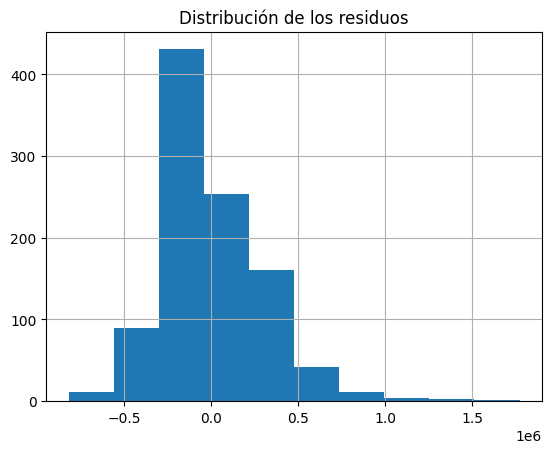

In [ ]:
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

### explicabilidad
El coeficiente de determinación, frecuentemente llamado R², es una medida estadística que indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.

Interpretando el R²
Varía de 0 a 1, un valor cercano a 1 indica que el modelo se ajusta bien a los datos, explicando la mayor parte de la variación en la variable dependiente/respuesta. Por otro lado, un valor cercano a 0 indica que el modelo no puede explicar mucha variación en la variable dependiente/respuesta.

Usando en la prueba
Además, el R² puede ser utilizado para comparar el rendimiento del modelo en diferentes conjuntos de datos, como entrenamiento y prueba. Esto ayuda a identificar problemas de sobreajuste (overfitting) o subajuste (underfitting). Idealmente, deseamos que el R² sea consistente entre los conjuntos de entrenamiento y prueba, indicando una buena capacidad de generalización del modelo para nuevos datos.

Fórmula
Una de las fórmulas del R² puede ser representada por la razón entre la variación explicada y la variación total. Por eso decimos que cuanto más cerca de 1, mejor es la adecuación del modelo, ya que la variación explicada será más cercana a la variación total en esta razón.

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [ ]:
# definiendo la 'Y' prevista
y_predict= modelo_0.predict(x_test)

In [ ]:
# importando el r2_score
from sklearn.metrics import r2_score

In [ ]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de: {round(r2_score(y_test,y_predict),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de: 0.39


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

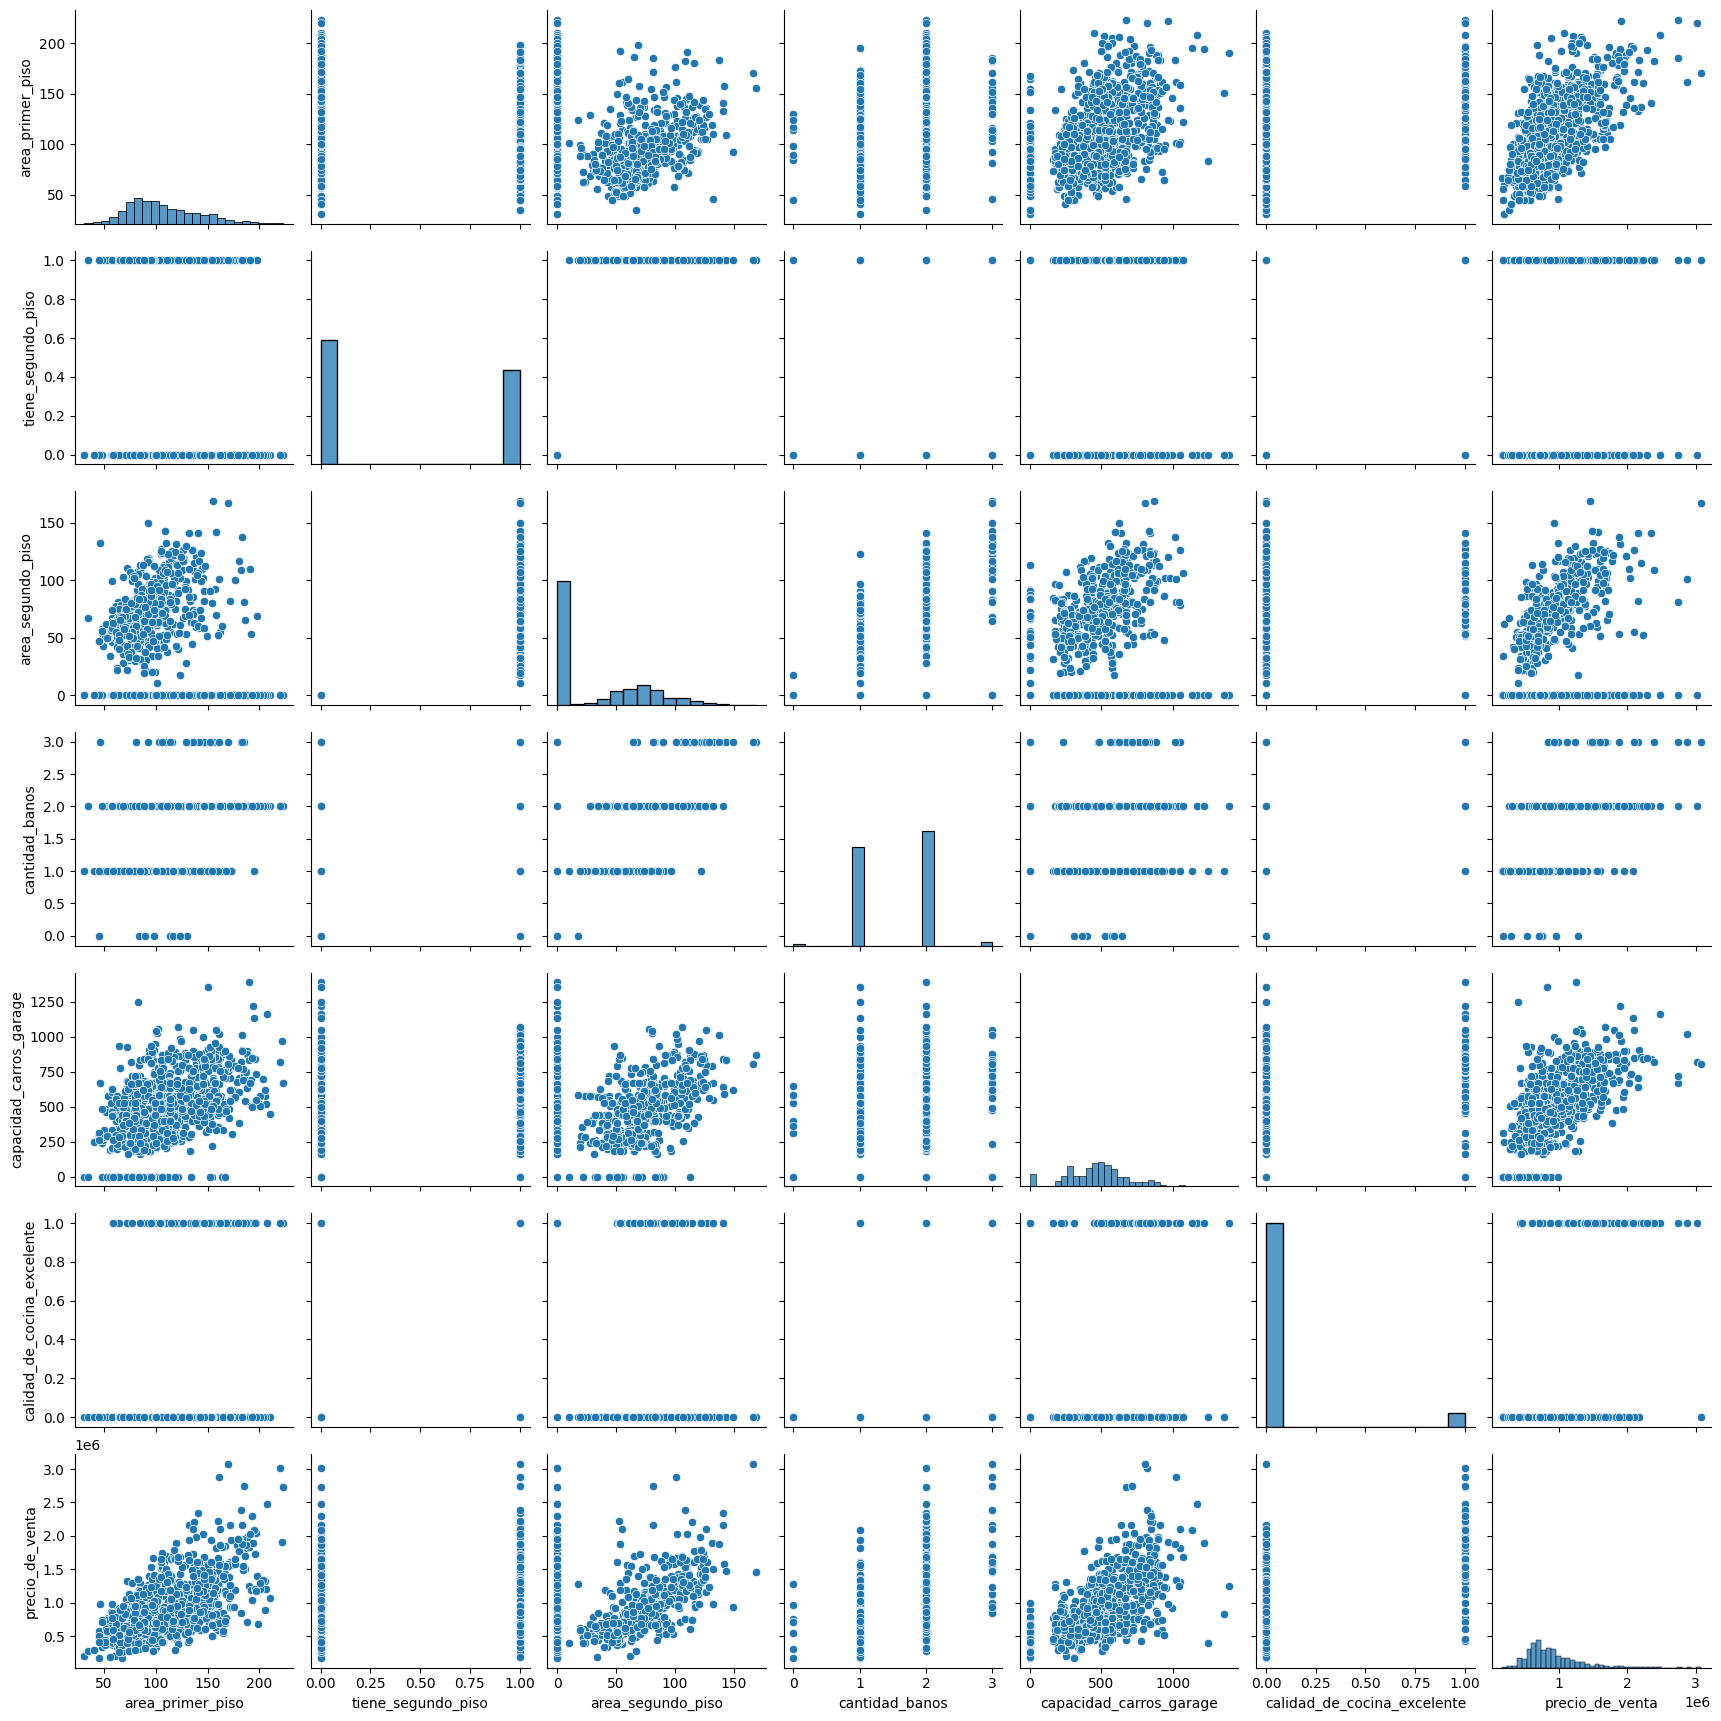

In [ ]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)#va usar todos los atributo y va a generar una grafica de gafricas con la informacion

irve mucho para ver como se relacionana las varibales de dispersion

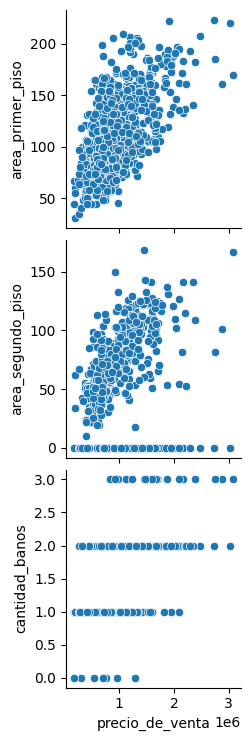

In [ ]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos,y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'],x_vars=['precio_de_venta'])

## Añadiendo factores al modelo

nos demos dado cuenta que tenemos otras variables que aumentan el precio de venta, ahora los agregaremos en diferentes modos

In [ ]:
# importando la api de statsmodels
import statsmodels.api as sm #atravess de esta api vamoss a añadir un valor constante a nuestro modelo y poder generar nuestras rectas utilizando el metodo ols

In [ ]:
# Añadiendo una constante
x_train=sm.add_constant(x_train)
x_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [ ]:
x_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [ ]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1=sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()#fit noss permite entrenar el modelo con lo datos

In [ ]:
# Modelo sin el área del segundo piso
modelo_2=sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [ ]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3=sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos',
       'calidad_de_cocina_excelente']]).fit()

In [ ]:
# Resumen del modelos
modelo=[modelo_0,modelo_1,modelo_2,modelo_3]

for i,j in enumerate(modelo):
  print(f'****************************************************************\n*********** El modelo {i} tiene el siguiente resumen*********\n****************************************************************')
  print(j.summary(),'\n\n')#aqui tenemos el resumen de cada uno de los modelos

****************************************************************
*********** El modelo 0 tiene el siguiente resumen*********
****************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        16:23:29   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    

In [ ]:
for i,j in enumerate(modelo):#obtener solo el coeficiente de determinacion de los modelos
  print(f'El coeficiente de determinacion R² del modelo {i} es de: {round(j.rsquared,2)}')

El coeficiente de determinacion R² del modelo 0 es de: 0.38
El coeficiente de determinacion R² del modelo 1 es de: 0.74
El coeficiente de determinacion R² del modelo 2 es de: 0.71
El coeficiente de determinacion R² del modelo 3 es de: 0.65


cuando estmaos analizando el coeficeinte de terminacion, la idea es observar objetos aislados de cada  uno de los atributos en la variacion de la variable de respuesta, cuanddo tenemo multicollinearity o multiplecolianidad significa que no podemos aislar bien el efecto de cada uno de los atributos y acaban sobre poniendose

por ende ess importante usar varibles que tengan efectos aislados

cuando tenemos esto en un modelo la multiplecolinealidad nos dice que nuestro modelo esta comprometido por lo tanto no es viable

###refinando la selección de modelos


En la clase sobre comparación de modelos de regresión lineal, exploramos cómo evaluar y seleccionar el modelo más adecuado utilizando el R² y otros criterios. Además de la selección manual que discutimos, existen métodos automáticos de selección de variables que pueden ser extremadamente útiles en situaciones donde el número de variables explicativas es grande. Estos métodos, como stepwise, backward y forward selection, siguen criterios predefinidos para agregar o eliminar variables del modelo de forma iterativa. Explora a continuación los métodos automáticos de selección de variables, que buscan equilibrar la complejidad del modelo y su capacidad explicativa.

El método de forward selection comienza con un modelo sin variables explicativas y agrega una a una, eligiendo en cada paso la variable que más mejora el modelo de acuerdo con un criterio estadístico específico, como el menor valor de p-valor o el mayor aumento en el R² ajustado.


El backward selection inicia con todas las variables posibles en el modelo y, de manera iterativa, elimina la variable que menos contribuye al modelo, nuevamente basándose en criterios como el p-valor o el impacto en el R² ajustado.


El stepwise selection es una combinación de los dos métodos anteriores, donde las variables pueden ser agregadas o eliminadas en cada paso, dependiendo de su contribución a la mejora del modelo.




Estos métodos de selección automática son herramientas poderosas que ayudan en la identificación del modelo más parsimonioso, es decir, aquel que puede explicar los datos de manera eficiente sin ser excesivamente complejo. Sin embargo, es crucial que el científico de datos comprenda y supervise el proceso, ya que la elección automática puede, a veces, introducir sesgo o sobreajuste, especialmente si el criterio de selección no es bien elegido o si el modelo no es validado adecuadamente con datos nuevos o de prueba.

## Comparando los modelos
Cuál es el modelo?


In [ ]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


con el modelo 3 podemos observar lo presios que se sumarian al valor final de nuestra casa, claro teniedno encuenta el error +- de la sdt error

####análisis y selección de modelos de regresión lineal

Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

análisis inicial con el PairPlot de Seaborn;
construir modelos de regresión lineal; y
realizar la comparación de estos modelos.
Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.


https://colab.research.google.com/drive/1KpcuYAawtxnfhajr1nP4ovrTuSk1cF5E

lo que aprendimos
Utilizar el pairplot de Seaborn para visualizar relaciones entre múltiples variables e identificar cuáles pueden influir en el precio de venta de las casas.
Agregar múltiples variables explicativas al modelo de regresión lineal para mejorar la precisión de las predicciones de precios.
Comparar diferentes modelos de regresión lineal utilizando el R² y el R² ajustado, además de analizar la multicolinealidad y otros factores.
Descubrir cómo interpretar los coeficientes del modelo de regresión lineal para entender el impacto de cada variable en el precio de las casas.
Entender la importancia de elegir el modelo más adecuado para la predicción de precios, considerando la simplicidad, la precisión y la interpretabilidad.

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [ ]:
# Añadiendo una constante en X_test
x_test=sm.add_constant(x_test)#agregamos la constante a nuestro data freame x_tesst es nuestra variable de prueba
x_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [ ]:
# Previsión con el modelo 3
prevision_3=modelo_3.predict(x_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos',
       'calidad_de_cocina_excelente']])#eatamo haciedno la prediction para la x_test

In [ ]:
# Cuál es el r²(coeficiente de determinacion) de la previsión?
print(f'El coeficiente R^2 de la base de prevision es: {modelo_3.rsquared.round(2)}')

El coeficiente R^2 de la base de prevision es: 0.65


In [ ]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R^2 con respecto a la base de entrenamiento es: {round(r2_score(y_test,prevision_3),2)}')

El coeficiente R^2 con respecto a la base de entrenamiento es: 0.64


lo que se busca es observar que si nuestra prevision esta bastante cercana a la manera con lo hizzo con los datos de entrenamiento al momento de comparar con los datos de prueba, quiere decir que nuestro modelo generalisando bien con datos que no a vissto.

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [ ]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [ ]:
#Nuevo inmueble
nuevo_inmueble=pd.DataFrame({
    'const':[1],
    'area_primer_piso':[120],
    'tiene_segundo_piso':[1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0]
})

In [ ]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso'].round(2))#este modleo solo explica el 37% del valor de la casa

,0
0,968146.285305


In [ ]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


cuando estamoss trabajando en una regresion lineal, los valoress o ceficientes multiplican cada uno de los valores que ingresamos, sumando o restando dependeindo de su signo al multiplicarlos por cada uno de sus valores en las variables

## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Leyendo varias casas?
url2='https://raw.githubusercontent/Kevincancino26/mis-notebook-de-estudio-/blob/main/data-science-probando-relaciones-con-regresion-lineal-main/nuevas_casas.csv'
nuevas_casas=pd.read_csv(url, delimiter=',')
nuevas_casas.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [ ]:
nuevas_casas.drop(columns='Id',inplace=True)

In [ ]:
# Añadiendo una constante
nuevas_casas=sm.add_constant(nuevas_casas)

In [ ]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
precio_casas=pd.DataFrame()
precio_casas['precio de venta']=modelo_3.predict(nuevas_casas[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos',
       'calidad_de_cocina_excelente']]).round(2)
precio_casas

,precio de venta
0,876049.37
1,885559.82
2,912434.38
3,786707.24
4,1040350.43
...,...
1433,931195.40
1434,1346626.11
1435,1064796.61
1436,631916.62


In [ ]:
nuevas_casas['precio de venta']=modelo_3.predict(nuevas_casas[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos',
       'calidad_de_cocina_excelente']]).round(2)
nuevas_casas.drop(columns='precio_de_venta',inplace=True)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio de venta
0,1.0,79.5224,1,79.3366,2,548,0,876049.37
1,1.0,117.2398,0,0.0000,2,460,0,885559.82
2,1.0,85.4680,1,80.4514,2,608,0,912434.38
3,1.0,89.2769,1,70.2324,1,642,0,786707.24
4,1.0,106.3705,1,97.8237,2,836,0,1040350.43
...,...,...,...,...,...,...,...,...
1433,1.0,88.5337,1,64.4726,2,460,0,931195.40
1434,1.0,192.5817,0,0.0000,2,500,0,1346626.11
1435,1.0,110.3652,1,107.0208,2,252,0,1064796.61
1436,1.0,100.1462,0,0.0000,1,240,0,631916.62


#### estimando el valor de una casa

Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

1 baño
Área 98m²
No tiene segundo piso
Calidad de la cocina excelente

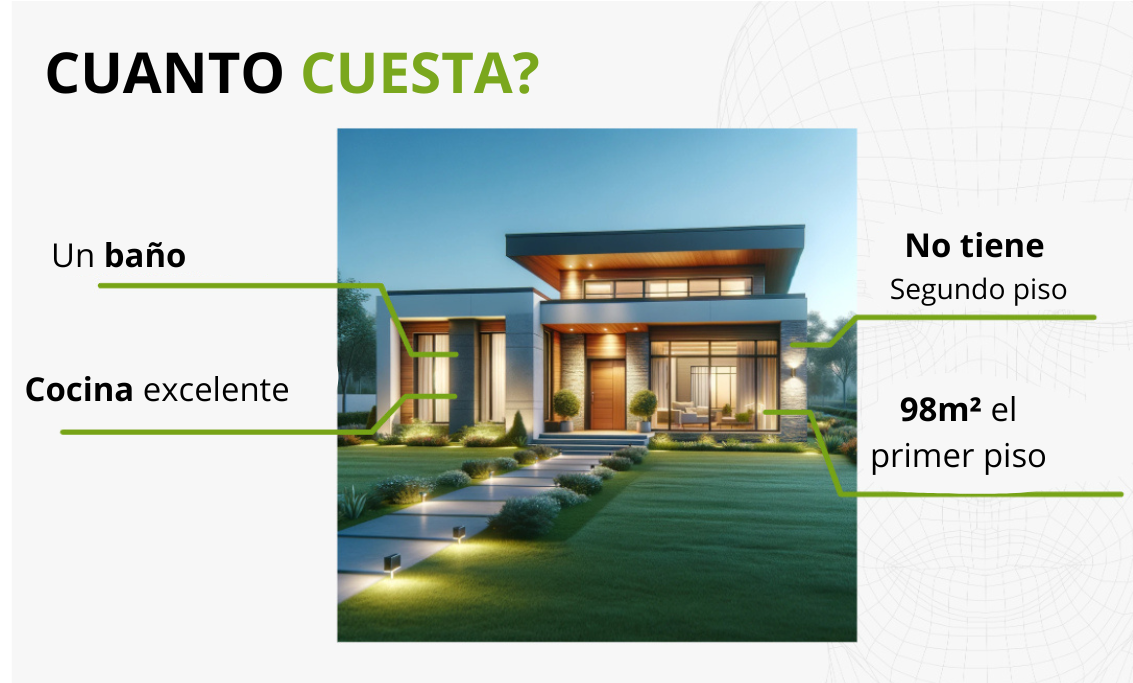

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.

In [ ]:
nuevo_inmueble=pd.DataFrame({
    'const':[1],
    'area_primer_piso':[98],
    'tiene_segundo_piso':[0], # Assuming it doesn't have a second floor for this example
    'cantidad_banos':[1],
    'calidad_de_cocina_excelente':[1]
})

print(f'El valor de la casa es de: ${modelo_3.predict(nuevo_inmueble)[0].round(2)}')

El valor de la casa es de: $1063173.85


####guardando el modelo en un archivo

Al desarrollar modelos de regresión con Statsmodels, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca pickle, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.

Vamos a explorar cómo guardar un modelo de regresión lineal de Statsmodels con la biblioteca pickle y luego cómo leer el archivo.

Cómo guardar el Modelo con Pickle
Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función pickle.dump(), indicando el modelo y el archivo como parámetros.



```
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo, archivo)
```
Cargar el Modelo de vuelta con Pickle
Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método pickle.load() utilizando el archivo como parámetro de la función.



```
# Cargar el modelo de vuelta del archivo
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)
```
A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

Para más detalles sobre el uso de la biblioteca pickle, consulte la documentación.







###¿Qué aprendimos?

En esta clase, aprendiste a:

Obtener la métrica R² del modelo a partir de datos de prueba;

Entender la importancia de la comparación de métricas de entrenamiento y prueba para verificar la generalización del modelo;

Utilizar el método predict para realizar la predicción de nuevos valores a partir de un modelo de regresión;

Guardar un modelo de machine learning utilizando la biblioteca pickle;

Leer archivos pickle para obtener el modelo en su estado original.

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [ ]:
# importar el VIF de statsmodel
#cuando no sabemos cuanto es que a variacion de las variables afectan nuestra variable principal cuando tenemos multicolinearidad
#nos apoyaremos en un recurso que es el factor de la variansa vyf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#este paquete nos permite entender si existe realmente o no multicolinearidad en nuestros modelos



In [ ]:
explicativas_1= ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_2=['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_3= ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']

In [ ]:
# VIF 1
vif_1=pd.DataFrame()
vif_1['variables']=explicativas_1
#vamos a clacular el factor de la varianza para este modelos
vif_1['vif']=[vif(x_train[explicativas_1],i)for i in range(len(explicativas_1))]
vif_1

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


existen valores para el area del primer piso y si tiene segundo piso son valores altos y bajos

al irno a la literatura cuando tenemos valores mayores a 5  nos indica que tenemoss multicolinealidad, menos no existe

al ver esto vemos que  si tiene segund o piso y area ssegundo pisno son mayores a 7 lo que nos indica que sis tiene segundo piso y area de segundo piso en nuestro modelo tenemos multicolinealdiad en con respecto a nuestrass variables

In [ ]:
# VIF 3
vif_3=pd.DataFrame()
vif_3['variables']=explicativas_3
#vamos a clacular el factor de la varianza para este modelos
vif_3['vif']=[vif(x_train[explicativas_3],i)for i in range(len(explicativas_3))]
vif_3

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


como podemos ver en nuestro modelo 3 no existe colinealidad

un aspecto que tenemos que tener encuenta el factor de inlfacion de la varianza, que nos permite entender entre nuestras variables si existe o no multicolinealidad entre los atributos para assi seleccionar los atributos que no presenten esta caracteristica y estos pueden explicar de forma aislada la variacion en nuestra variable respuesta

siendo este uno de los factores importantes para trabajar con los modelos de regresion lineal

## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [85]:
y_previsto_train=modelo_3.predict(x_train[explicativas_3])

In [92]:
fig=px.scatter(x=y_previsto_train,y=y_train,title='Valor previsto vs real',labels={'x':'Valor prebisto','y:':'Valor real'})
fig.show()#la idea es ver como nuestro modelo esta prediciendo el valro de las casas y si lo esta haceidno de forma correcta

al ver la grafica podemos ver que nuestro modelo generaliza mejor entre los valroes de 0.5 a menor al 1m dadoq ue apartir de este ultimo nuestro modelo erroa al predecir el precio de la casa

In [93]:
#residuos , vamos a ver el valor de los residuos para observar el comportamiento
residuos=modelo_3.resid
fig=px.scatter(x=y_previsto_train,y=residuos,title='Valor previsto vs residuos',labels={'x':'Valor prebisto','y:':'residuos'})
fig.show()

al revisar la grafica podemos observar que nuestro modelo de 0 hasta 1200 millon tiende a predecir relativamente viend deribadoq que entre mas cerca estend el cero mayor es la exactitud de la prediccion dado por el residuo peor vemos que despues de esta cantidad lo valroes del resiudio se alejan y despersan por ende vemos que nuestro modelo en no logra predecir con exactitud luego del 1200

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">